In [1]:
import tensorflow as tf

In [46]:
from tensorflow.keras.datasets import fashion_mnist

fmnist = fashion_mnist.load_data()

In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
(X_train, y_train), (X_test, y_test) = fmnist
X_train.shape

(60000, 28, 28)

In [50]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

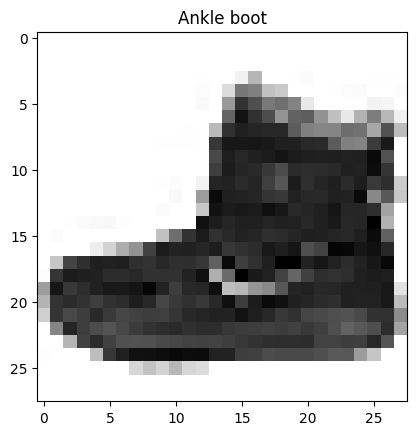

In [51]:
plt.imshow(X_train[0], cmap = 'binary')
plt.title(class_names[y_train[0]])
plt.show()

In [52]:
X_train = X_train/255.0
X_test = X_test/255.0

In [53]:
#First method sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

In [54]:
tf.random.set_seed(42)
model = Sequential()
model.add(InputLayer(shape=[28,28]))
model.add(Flatten())  # Flatten reshape qilib beradi 60000, 28,28 -> 60000, 784
model.add(Dense(300, activation='relu'))  #Dense parametrlari bar bolgan haqiyqiy layer
model.add(Dense(100, activation='relu'))  
model.add(Dense(10, activation='softmax')) 

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
weights, bias  = model.get_layer('dense_9').get_weights()

In [59]:
weights.shape

(784, 300)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
history  = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.7685 - loss: 0.6974 - val_accuracy: 0.7858 - val_loss: 0.5813
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 51ms/step - accuracy: 0.8324 - loss: 0.4803 - val_accuracy: 0.8096 - val_loss: 0.5236
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 38ms/step - accuracy: 0.8484 - loss: 0.4349 - val_accuracy: 0.8235 - val_loss: 0.4899
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8581 - loss: 0.4070 - val_accuracy: 0.8335 - val_loss: 0.4641
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8648 - loss: 0.3867 - val_accuracy: 0.8405 - val_loss: 0.4471
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8702 - loss: 0.3707 - val_accuracy: 0.8450 - val_loss: 0.4348
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8740 - loss: 0.3572 - val_accuracy: 0.8516 - val_loss: 0.4208
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8771 - lo

In [15]:
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 10))

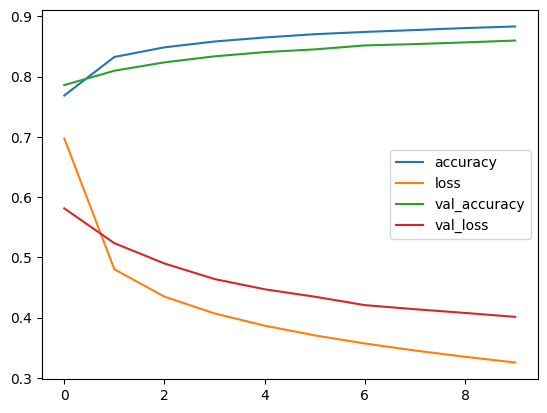

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8597 - loss: 0.4014


[0.4013795554637909, 0.8597000241279602]

In [26]:
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
y_test

array([9, 2, 1, ..., 8, 1, 5], shape=(10000,), dtype=uint8)

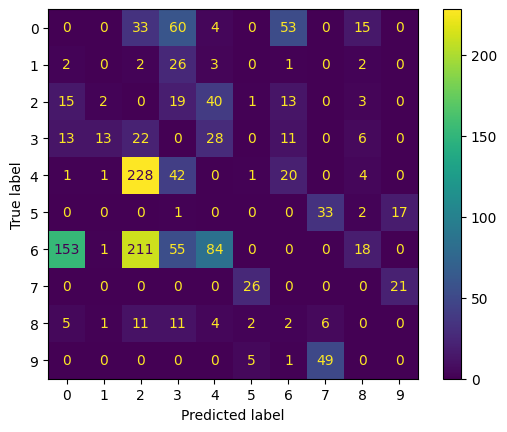

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, sample_weight=y_pred!=y_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [61]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history  = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8274 - loss: 0.4790 - val_accuracy: 0.8547 - val_loss: 0.4002
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8678 - loss: 0.3590 - val_accuracy: 0.8656 - val_loss: 0.3727
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.8798 - loss: 0.3226 - val_accuracy: 0.8709 - val_loss: 0.3545
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8885 - loss: 0.2975 - val_accuracy: 0.8695 - val_loss: 0.3635
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8962 - loss: 0.2786 - val_accuracy: 0.8691 - val_loss: 0.3731
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9010 - loss: 0.2640 - val_accuracy: 0.8665 - val_loss: 0.3768
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 58ms/step - accuracy: 0.9048 - loss: 0.2518 - val_accuracy: 0.8668 - val_loss: 0.3973
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 68ms/step - accuracy: 0.9082 -

In [64]:
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


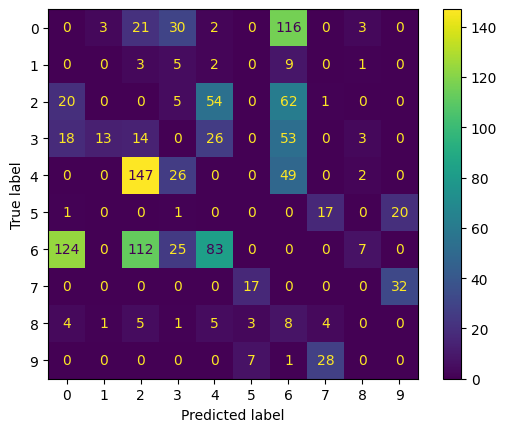

In [65]:
cm = confusion_matrix(y_test, y_pred, sample_weight=y_pred!=y_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
X_wrong = X_test[(y_pred==6 * y_test==0)]
plt.imshow(X_wrong[0], cmap = 'binary')
plt.show()